## Importing the Libraries

In [1]:
from transformers import pipeline # type: ignore
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns

import os

print(torch.__version__)

/Users/nuwandharmarathna/Desktop/My W/worldcup-analysis/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.5.1


## Load CSV and load the model

In [2]:
# Load and Preprocess Commentary Data
commentary_df = pd.read_csv('./data/commentary_2023.csv')

In [3]:
# Install and load the model
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

commentary_df['sentiment'] = commentary_df['commentary'].apply(sentiment_model)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [4]:
# Save the updated dataframe
commentary_df.to_csv("./data/commentary_with_sentiment.csv", index=False)

print("Sentiment analysis completed and saved!")


Sentiment analysis completed and saved!


In [5]:
# Count the occurrences of each sentiment
sentiment_counts = commentary_df['sentiment'].value_counts()


## Visualize the sentiment spread

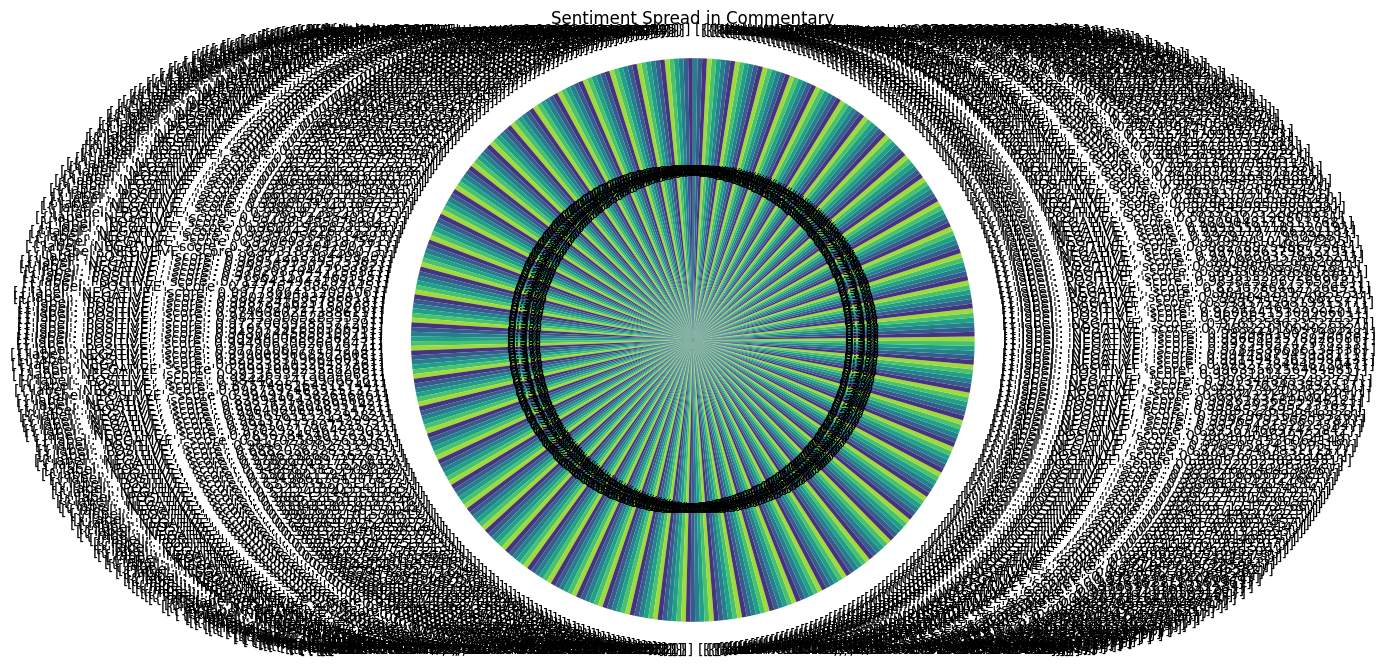

In [6]:
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
plt.title("Sentiment Spread in Commentary")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

## Entity-based Sentiment Analysis

   * extend the functionality of a pre-trained Hugging Face sentiment analysis model to analyze sentiment relative to specific entities, such as teams or players mentioned in cricket commentary.

In [7]:
# Load the NER pipeline
ner_model = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [8]:
def entity_sentiment_analysis(text, target_entity, sentiment_model, ner_model):
    # Extract entities
    entities = ner_model(text)
    entity_names = [e['word'] for e in entities]
    
    # Check if the target entity is in the text
    if target_entity not in entity_names:
        return f"No sentiment detected for {target_entity}"
    
    # Get sentiment
    sentiment = sentiment_model(text)[0]['label']
    
    # Interpret sentiment relative to the entity
    if target_entity in text:
        if sentiment == "POSITIVE":
            return f"Positive sentiment for {target_entity}"
        elif sentiment == "NEGATIVE":
            return f"Negative sentiment for {target_entity}"
    
    return f"Neutral sentiment for {target_entity}"


In [9]:
# Testing usage

text = "India missed a catch and gave away 4 runs."
result = entity_sentiment_analysis(text, "India", sentiment_model, ner_model)
print(result)

Negative sentiment for India


## Save the models

In [10]:
# Ensure the models directory exists
os.makedirs("models", exist_ok=True)

In [12]:
from joblib import dump
dump(sentiment_model, "models/sentiment_model.joblib")
dump(ner_model, "models/ner_model.joblib")


['models/ner_model.joblib']